# Distributions

## Imports etc

In [141]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gamma, pareto
import functools
import scipy
import sympy as s

%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gamma

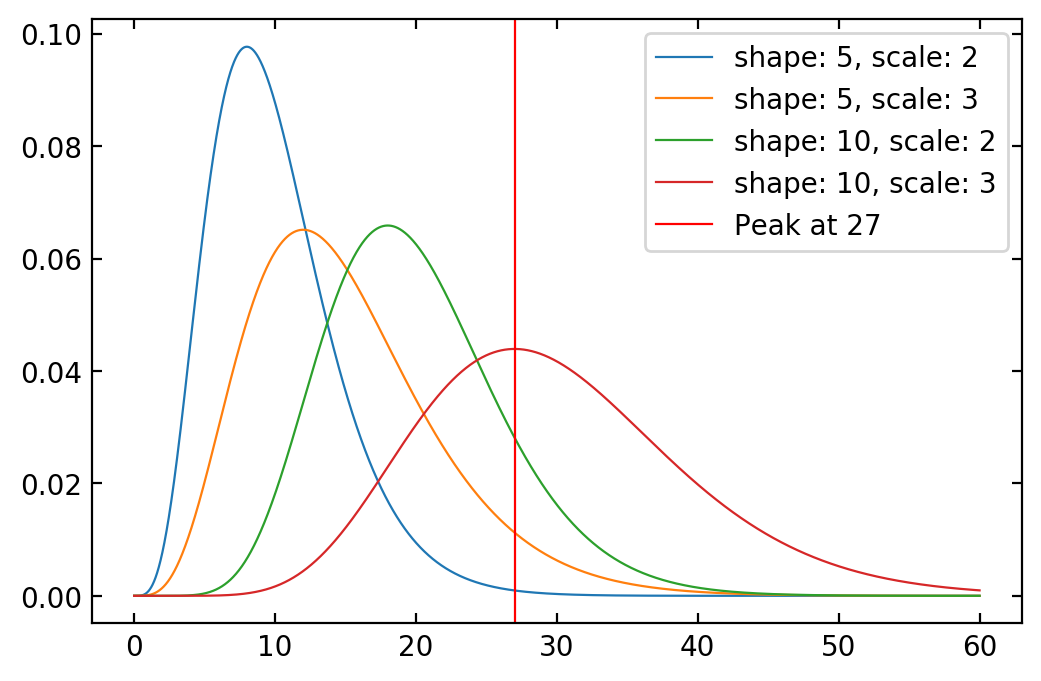

In [3]:
test_x = np.linspace(0, 60, num=5000)
_, ax = plt.subplots()
for a, s in[(5, 2), (5, 3), (10, 2), (10, 3)]:
    ax.plot(test_x, gamma(a=a, scale=s).pdf(test_x), label="shape: {}, scale: {}".format(a, s))

ax.axvline(27, color="red", label="Peak at 27")
ax.legend()

# Power Law

See:
* http://tuvalu.santafe.edu/~aaronc/courses/7000/csci7000-001_2011_L2.pdf
* https://stackoverflow.com/questions/31114330/python-generating-random-numbers-from-a-power-law-distribution
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html
* My stats notes

A power law can be written as: `P(x) = b / (x ^ (b+1))`. Luckily for us scipy stats has this implemented!

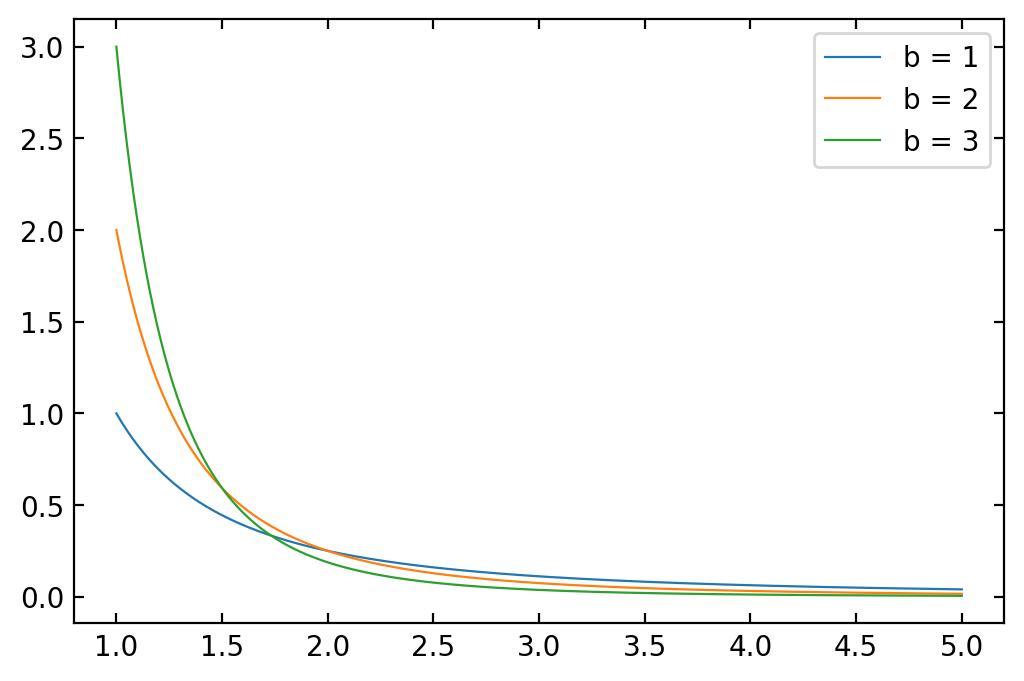

In [176]:
# Now get a rough look at what this looks like
_, ax = plt.subplots()

test_x = np.linspace(1, 5, num=1000)

for b in [1, 2, 3]:
    ax.plot(test_x, pareto.pdf(test_x, b), label="b = {}".format(b))

ax.legend()

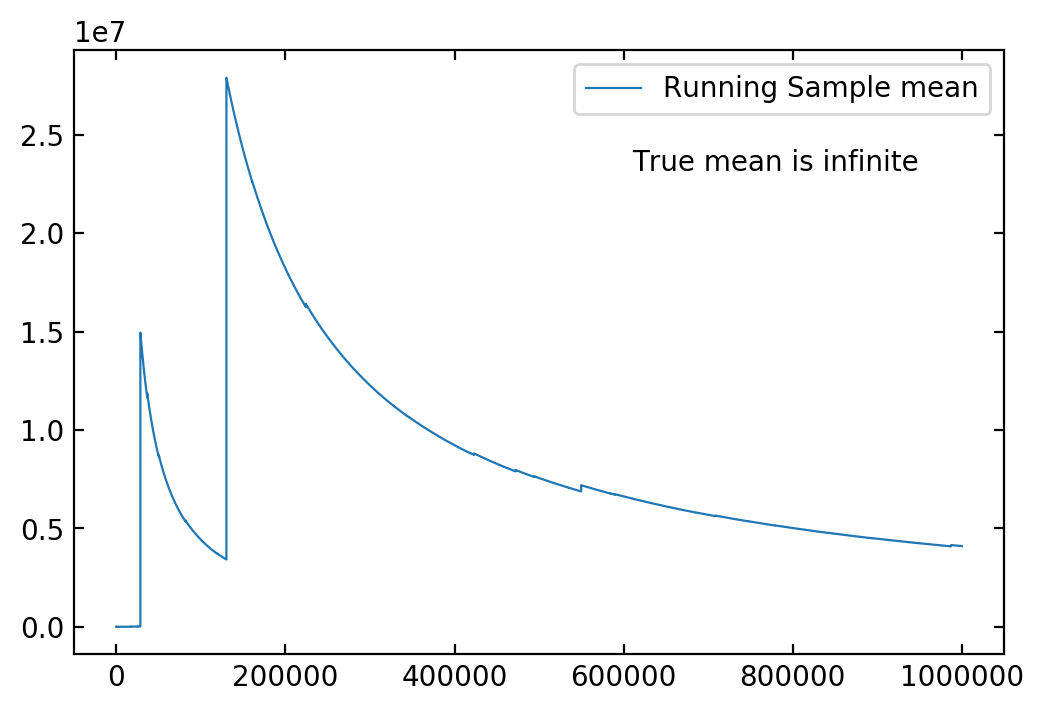

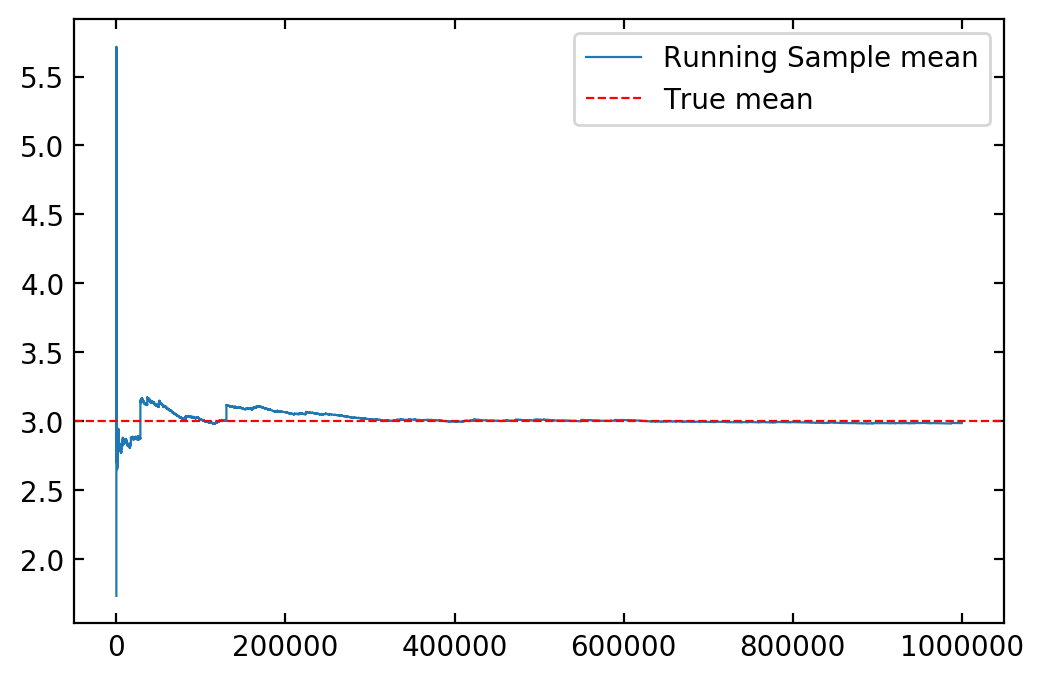

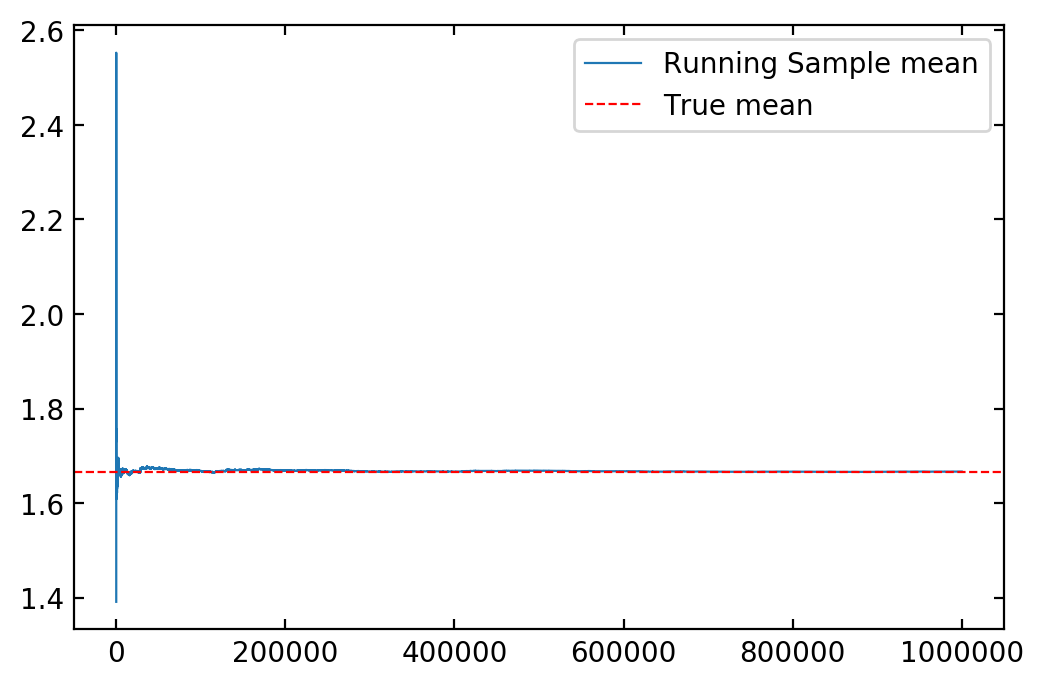

In [204]:
## What do various stats for this look like?

def running_mean(samples):
    means = np.zeros_like(samples)
    cur_mean = 0
    for i in range(len(samples)):
        means[i] = (cur_mean * i + samples[i]) / (i+1)
        cur_mean = means[i]
    return means


for b in [0.5, 1.5, 2.5]:
    p = pareto(b)
    print()
    
# Can we see this with sampling?
for b in [0.5, 1.5, 2.5]:
    f = pareto(b)
    exp_mean, _ = f.stats()
    np.random.seed(1200)
    samples = f.rvs(size = 1000000)
    
    _, ax = plt.subplots()
    ax.plot(running_mean(samples), label="Running Sample mean")
    if np.isfinite(exp_mean):
        ax.axhline(exp_mean, ls="--", color="r", label="True mean")
    else:
        ax.annotate("True mean is infinite", (0.6, 0.8), xycoords="axes fraction")
    ax.legend()